### AND 연산과 OR연산 학습이 가능한지

In [8]:
import tensorflow as tf
import numpy as np
# AND
x_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_data = np.array([[0],[0],[0],[1]])
# OR
# y_data = np.array([[0],[1],[1],[1]])
# XOR
# y_data = np.array([[0],[1],[1],[0]])

# Logistic Regression
X = tf.placeholder(shape=[None,2], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([2,1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1,]), dtype = tf.float32)

logit= tf.matmul(X,W) + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_value, weight_value = sess.run([train,cost,W], feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print("cost : {}, W : {}".format(cost_value, weight_value))

        
predict = tf.cast(H>0.5, dtype = tf.float32)        
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("accuracy : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))
print("{}".format(sess.run(predict, feed_dict={X:[[1,0]]})))



cost : 1.1717188358306885, W : [[-2.1944666]
 [-1.1163056]]
cost : 0.3871822953224182, W : [[0.7348619]
 [1.0511891]]
cost : 0.25197702646255493, W : [[1.7701083]
 [1.8644004]]
cost : 0.18956831097602844, W : [[2.4184332]
 [2.4519506]]
cost : 0.15224851667881012, W : [[2.9028447]
 [2.916587 ]]
cost : 0.12711101770401, W : [[3.2946079]
 [3.3009164]]
accuracy : 1.0
[[0.]]


### Multiple layer를 이용한 XOR문제 해결

![image](https://user-images.githubusercontent.com/28910538/53850029-4d706c80-3ffd-11e9-84d1-36fbe636a08c.png)


![image](https://user-images.githubusercontent.com/28910538/53849515-7d1e7500-3ffb-11e9-8064-ddb6f9436943.png)


In [17]:
import tensorflow as tf

x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)
# Weight & bias
W1 = tf.Variable(tf.random_normal([2,256]), dtype= tf.float32, name = "weight1")
b1 = tf.Variable(tf.random_normal([256]), dtype= tf.float32, name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,512]), dtype= tf.float32, name = "weight2")
b2 = tf.Variable(tf.random_normal([512]), dtype= tf.float32, name = "bias2")
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)


W3 = tf.Variable(tf.random_normal([512,1]), dtype=tf.float32, name = "weight3")
b3 = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias3")
# Hpyothesis
logit = tf.matmul(layer2, W3) + b3
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, cost_value, weight_value = sess.run([train, cost, W], feed_dict={X:x_data, Y:y_data})
    if step % 2000 == 0:
        print("cost : {}, W : {}".format(cost_value, weight_value))
        
predict = tf.cast(H>0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("accuracy : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))


cost : 1.6183271408081055, W : [[-0.99545586]
 [-0.61006016]]
cost : 0.0008342807414010167, W : [[-0.99545586]
 [-0.61006016]]
cost : 0.00045081679127179086, W : [[-0.99545586]
 [-0.61006016]]
cost : 0.000311503914417699, W : [[-0.99545586]
 [-0.61006016]]
cost : 0.00023920151579659432, W : [[-0.99545586]
 [-0.61006016]]
accuracy : 1.0


In [34]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("./data/mnist", one_hot =True)

print("mnist.train.images.shape : {}, mnist.train.labels.shape : {}".format(mnist.train.images.shape, mnist.train.labels.shape))

X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256]), dtype = tf.float32, name = "weight1")
b1 = tf.Variable(tf.random_normal([256]), dtype = tf.float32, name = "bias1")
h_layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 512]), dtype = tf.float32, name = "weight2")
b2 = tf.Variable(tf.random_normal([512]), dtype = tf.float32, name = "bias2")
h_layer2 = tf.sigmoid(tf.matmul(h_layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([512, 10]), dtype = tf.float32, name = "weight3")
b3 = tf.Variable(tf.random_normal([10]), dtype = tf.float32, name = "bias3")
logit = tf.matmul(h_layer2, W3) + b3
H = tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= logit, labels= Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_epoch = 30
batch_size = 100

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([train, cost], feed_dict = {X:batch_x, Y:batch_y})
    if step % 6 == 0:
        print("cost : {}".format(cost_value))

predict = tf.argmax(H, axis = 1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
    
print("accuracy : {}".format(sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})))



Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
mnist.train.images.shape : (55000, 784), mnist.train.labels.shape : (55000, 10)
cost : 1.4041918516159058
cost : 0.3303096294403076
cost : 0.2625373303890228
cost : 0.12134835869073868
cost : 0.1898123025894165
cost : 0.3836968243122101
cost : 0.1858980506658554
cost : 0.08060447871685028
cost : 0.03632713854312897
cost : 0.02304166741669178
accuracy : 0.9176999926567078


### 학습률을 높이기 위해
- 1. sigmoid 대신 Relu
- 2. Xavier initialization
    - 초기 weight 설정을 0으로주거나 랜덤으로 주지않고 => weight 초기화
    - W = np.random.randn(num_of_input, num_of_output) / np.sqrt(num_of_input / 2)
- 3. Dropout
    - overfitting 방지하기 위함
    - 학습할때는 어느정도의 노드를 dropout

### vanishing gradient problem 
- sigmoid는 0~1 값 리턴, 근데 값이 크거나 작을때의 sigmoid의 기울기는 0에 가까움
- 역전파 오류가 반복되면 이러한 0에 가까운 값이 곱해짐으로써 학습이 더 안됨
- 때문에 sigmoid 대신 relu를 사용
    - relu는 음수일때는 0 양수일때는 그대로의 값 즉 기울기1

#### tf graph 싹 다 초기화  
- tf.reset_default_graph()

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

tf.reset_default_graph()

mnist = input_data.read_data_sets("./data/mnist", one_hot =True)

print("mnist.train.images.shape : {}, mnist.train.labels.shape : {}".format(mnist.train.images.shape, mnist.train.labels.shape))

X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
# 살릴 확률
keep_prob = tf.placeholder(dtype = tf.float32)
# Xavier_initialization
W1 = tf.get_variable("weight1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), dtype = tf.float32, name = "bias1")
# relu , dropout
_h_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
h_layer1 = tf.nn.dropout(_h_layer1, keep_prob=keep_prob)

W2 = tf.get_variable("weight2", shape=[256, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), dtype = tf.float32, name = "bias2")
_h_layer2 = tf.nn.relu(tf.matmul(h_layer1,W2) + b2)
h_layer2 = tf.nn.dropout(_h_layer2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([512, 10]), dtype = tf.float32, name = "weight3")
W3 = tf.get_variable("weight3", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), dtype = tf.float32, name = "bias3")

# logit = tf.matmul(h_layer2, W3) + b3
# H = tf.nn.softmax(logit)
H = tf.matmul(h_layer2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= H, labels= Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_epoch = 30
batch_size = 100

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([train, cost], feed_dict = {X:batch_x, Y:batch_y, keep_prob:0.7})
    if step % 6 == 0:
        print("cost : {}".format(cost_value))

predict = tf.argmax(H, axis = 1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
    
print("accuracy : {}".format(sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.0})))



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
mnist.train.images.shape : (55000, 784), mnist.train.labels.shape : (55000, 10)
cost : 0.2899751365184784
cost : 0.07781501114368439
cost : 0.06655004620552063
cost : 0.04430902376770973
cost : 0.0968281477689743
accuracy : 0.9815000295639038


# CNN(Convolutional Neural Netowrks)
- 이전의 NN와 차이는  fully connected
- CNN은 이미지 일부만을 일단 처리(Filter 이용)
- Output size : (N-F)/stride + 1
- activation map으로 가기전에 relu 적용
- 그리고 사이즈 줄여주기위해 Pooling


In [11]:
import tensorflow as tf
import numpy as np
# (1,3,3,1) 이미지개수, 가로,세로, color
# 맨 앞에꺼를 행으로 생각하면서 풀어가면 됨
# 1을 행으로생각 3,3,1열
# 3을 행으로 생각 3,1열
# 3을 행으로 생각 1열
input_img = np.array([[[[1],[2],[3]],
                       [[4],[5],[6]],
                       [[7],[8],[9]]]], dtype = np.float32)
# (1,2,2,1)
# W = np.array([[[[1]],[[1]]],
#               [[[1]],[[1]]]],dtype = np.float32)
# (2,2,1,3) => 가로 세로 color 필터 개수
W = np.array([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]])
# ()
print("input의 shape : {}, filter의 shape : {}".format(input_img.shape, W.shape))
# strides를 4차원으로 적어줌 => 앞의 shape처럼
# 앞과 뒤는 4차원 맞추기위한 패딩 중간 1,1이 행으로1 열로1씩 stride를 적용
# VALID는 패딩을 안한다는거 SAME은 원본과 아웃풋 크기 같게하겠다는(패딩을 하겠다는)

conv2d = tf.nn.conv2d(input_img, W, strides =[1,1,1,1], padding="VALID")
conv2d = tf.nn.relu(conv2d)
# 위 두줄을 아래 한줄로 표현
# conv2d = tf.layers.conv2d(inputs=input_img, filters=32, kernel_size = [2,2], padding="VALID", strides=1, activation = tf.nn.relu)


sess = tf.Session()
sess.run(conv2d)

input의 shape : (1, 3, 3, 1), filter의 shape : (2, 2, 1, 3)


array([[[[ 12., 120.,   0.],
         [ 16., 160.,   0.]],

        [[ 24., 240.,   0.],
         [ 28., 280.,   0.]]]], dtype=float32)

In [21]:
import tensorflow as tf
import numpy as np

# image = > (1,2,2,1)
images = np.array([[[[4],[3]],[[2],[1]]]], dtype = np.float32)
print(images.shape)
pool = tf.nn.max_pool(images, ksize=[1,2,2,1], strides =[1,1,1,1], padding="SAME")
sess.run(pool)


(1, 2, 2, 1)


array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)

### np.swapaxes(reulst, sh1, sh2)
- sh1과 sh2축을 바꿈

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


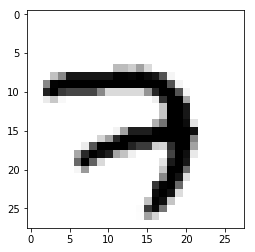

(1, 28, 28, 1)
(1, 14, 14, 5)


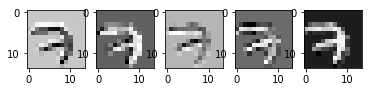

In [54]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

img = mnist.train.images[0]
plt.imshow(img.reshape(28,28), cmap="Greys")
plt.show()
# 1깊이의 28x28짜리 1개
img = img.reshape((1,28,28,1))
print(img.shape)
# 3x3짜리 1깊이 5개
W = tf.Variable(tf.random_normal([3,3,1,5]), dtype = tf.float32)
# strides가 1x1일 때 padding이 SAME, Strides가 2x2면 줄어들게 됨 padding이 SAME이여도
conv2d = tf.nn.conv2d(img, W, strides=[1,2,2,1], padding="SAME")

sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(conv2d)
print(result.shape)
## 1,14,14,5의 shape으로 이미지 뽑기 위해  axis 변경 해서 (5,14,14,1) 의 형태로 변형
# 0번째와 3번째를 바꿈
result = np.swapaxes(result, 0,3)
# 1행5열 짜리 axes에 넣어줌
fig, axes = plt.subplots(1,5)

for idx, t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(14,14), cmap="Greys")
plt.show()

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


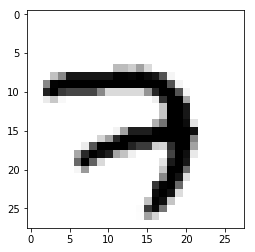

(1, 28, 28, 1)
(1, 7, 7, 5)


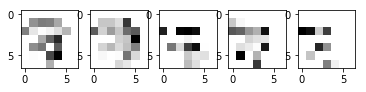

In [61]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

img = mnist.train.images[0]
plt.imshow(img.reshape(28,28), cmap="Greys")
plt.show()
# 1깊이의 28x28짜리 1개
img = img.reshape((1,28,28,1))
print(img.shape)
# 3x3짜리 1깊이 5개 필터
W = tf.Variable(tf.random_normal([3,3,1,5]), dtype = tf.float32)
# strides가 1x1일 때 padding이 SAME, Strides가 2x2면 줄어들게 됨 padding이 SAME이여도
conv2d = tf.nn.conv2d(img, W, strides=[1,2,2,1], padding="SAME")
# tf.nn.relu
conv2d = tf.nn.relu(conv2d)
# Max Pooling (sub sampling)
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides=[1,2,2,1], padding="SAME")

sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(pool)
print(result.shape)

result = np.swapaxes(result, 0,3)
# 1행5열 짜리 axes에 넣어줌
fig, axes = plt.subplots(1,5)

for idx, t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(7,7), cmap="Greys")
plt.show()

# MNIST CNN

In [84]:
mnist.train.images.shape

(55000, 784)

In [142]:
import tensorflow as tf
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# 0. Data load
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# 1. CNN - 특징 추출
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

# placeholder
X = tf.placeholder(shape = [None, 784], dtype= tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype= tf.float32)
# input conv image
X_img = tf.reshape(X, shape = [-1, 28,28,1])
# drop out
keep_rate = tf.placeholder(dtype = tf.float32)

# 표준편차를 작게 줘서 비슷한 값 뽑히게
# 3x3 필터(1차원) 32개
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
# conv ~ 28*28(1d) 32개
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
# relu
L1 = tf.nn.relu(L1)
print(L1.shape)
# 2x2 Pooling 14*14(1d) 32개 
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#
L2 = tf.layers.conv2d(inputs=L1, filters=64, kernel_size =[3,3], padding="SAME", strides = 1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs = L2, pool_size=[2,2],padding="SAME",strides = 2)

print(L2.shape)

###FC
L2 = tf.reshape(L2, shape=[-1,7*7*64])

W2 = tf.get_variable("weight2", shape=[7*7*64,256], initializer= tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
_layer1 = tf.nn.relu(tf.matmul(L2,W2)+b2)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_rate)

W3 = tf.get_variable("weight3", shape=[256,256], initializer= tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name = "bias3")
_layer2 = tf.nn.relu(tf.matmul(layer1,W3)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_rate)

W4 = tf.get_variable("weight4", shape=[256,10], initializer= tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([10]), name = "bias4")

H = tf.matmul(layer2, W4) + b4

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=H, labels=Y))
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_epoch = 10
batch_size = 100
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X:batch_x, Y:batch_y,keep_rate:0.7})
    if step%2 == 0:
        print("cost_val : {}".format(cost_val))

predict = tf.argmax(H,axis = 1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_sum(tf.cast(correct, dtype = tf.float32))

result_sum = 0

num_of_iter = int(mnist.test.num_examples/batch_size)
for i in range(num_of_iter):
    batch_x, batch_y = mnist.test.next_batch(batch_size)
    correct_num = sess.run(accuracy, feed_dict={X:batch_x,
                                             Y:batch_y,
                                             keep_rate : 1.0})
    result_sum += correct_num
result = result_sum/mnist.test.num_examples

print("accuracy : {}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(?, 28, 28, 32)
(?, 7, 7, 64)
cost_val : 0.10161174088716507
cost_val : 0.18134351074695587
cost_val : 0.06131645664572716
cost_val : 0.06951934844255447
cost_val : 0.15346868336200714
accuracy : 0.9831


In [152]:
import tensorflow as tf
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
################ 0. data load
tf.reset_default_graph()
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
# mnist (55000, 28*28)
################ 1. placeholder
X = tf.placeholder(shape = [None, 28*28], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
# drop oout
set_prob = tf.placeholder(dtype = tf.float32)
X_img = tf.reshape(X, [-1, 28, 28, 1])
################ conv_layer 1
print(X_img.shape)
filter_1 = tf.Variable(tf.random_normal([5,5,1,10], stddev=0.1), dtype = tf.float32)
conv_layer1 = tf.nn.conv2d(X_img, filter_1, strides=[1,1,1,1], padding="VALID")
print(conv_layer1.shape)
conv_layer1 = tf.nn.relu(conv_layer1)
conv_layer1 = tf.nn.max_pool(conv_layer1,ksize = [1,2,2,1],strides= [1,2,2,1], padding="SAME")
print(conv_layer1.shape)
################ conv_layer 2
filter_2 = tf.Variable(tf.random_normal([5,5,10,20], stddev=0.1), dtype = tf.float32)
conv_layer2 = tf.nn.conv2d(conv_layer1, filter_2, strides=[1,1,1,1], padding="VALID")
print(conv_layer2.shape)
conv_layer2 = tf.nn.relu(conv_layer2)
conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print(conv_layer2.shape)
################ Fully Connected layer
flatten_X = tf.reshape(conv_layer2, [-1, 4*4*20])

W1 = tf.get_variable("weight1", shape = [4*4*20, 100],
                    initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable("bias1", tf.random_normal([100]), dtype = tf.float32)
_fc_layer1 = tf.nn.relu(tf.matmul(flatten_X, W1)+b)
fc_layer1 = tf.nn.dropout(_fc_layer1, keep_prob=set_prob)

W2 = tf.get_variable("weight2", shape = [100, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable("bias2", tf.random_normal([10]), dtype = tf.float32)

logit = tf.matmul(fc_layer1, W2)+b
H = tf.nn.softmax(logit)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, labels = Y))







Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 28, 28, 1)
(?, 24, 24, 10)
(?, 12, 12, 10)
(?, 8, 8, 20)
(?, 4, 4, 20)


AttributeError: module 'tensorflow.contrib.layers' has no attribute 'xaviers_initializer'